In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

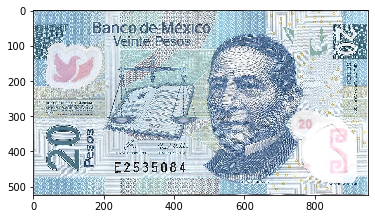

In [2]:
img = cv2.imread('Datos/Billetes/MX020N_07a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img)
plt.show()

Ximg (498324, 3) [[255. 249. 247.]
 [255. 252. 252.]
 [244. 242. 243.]
 [111. 112. 116.]
 [  0.   4.  15.]]
rgb_mean [0.30201941 0.33661288 0.36135366]
m_cov [[ 1.27676930e-03 -8.94426616e-05 -1.18308414e-03]
 [-8.94426616e-05  1.36331103e-04 -4.21600014e-05]
 [-1.18308414e-03 -4.21600014e-05  1.23032012e-03]]
rgb_mean [0.30201941 0.33661288 0.36135366]


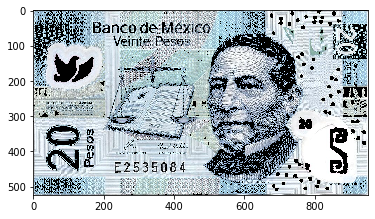

In [3]:
img = cv2.imread('Datos/Billetes/MX020N_07a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

nr,nc,nch = img.shape
imgv = np.reshape(img,(nr*nc,3))

img = img.astype('float')
Ximg = np.reshape(img,(nr*nc,3))
print('Ximg',Ximg.shape,Ximg[:5,:])
for i in range(len(Ximg)):
    if np.sum(Ximg[i,:]) == 0:
        Ximg[i,:] = [0,0,0]
    else:
        Ximg[i,:] = Ximg[i,:]/np.sum(Ximg[i,:]) 
    
rgb_mean = np.mean(Ximg,axis=0)
print('rgb_mean',rgb_mean)
m_cov = np.cov(Ximg.transpose())
print('m_cov',m_cov)
eigenvalues,eigenvectors = np.linalg.eig(m_cov)
std = np.sqrt(max(eigenvalues))

print('rgb_mean',rgb_mean)
dist = Ximg-rgb_mean
dist = np.sqrt(dist[:,0]**2+dist[:,1]**2+dist[:,2]**2)

Ximg[dist>std,:] = [0,0,0]
imgv[dist>std,:] = [0,0,0]

img2 = np.reshape(imgv,(nr,nc,3))
plt.figure()
plt.imshow(img2)
plt.show()

In [4]:
def get_rgb(img):
    nr,nc,nch = img.shape
    img = np.resize(img,(int(nr/4),int(nc/4),nch))
    nr,nc,nch = img.shape
    img = img.astype('float')
    Ximg = np.reshape(img,(nr*nc,3))
    for i in range(len(Ximg)):
        if np.sum(Ximg[i,:]) == 0:
            Ximg[i,:] = [0,0,0]
        else:
            Ximg[i,:] = Ximg[i,:]/np.sum(Ximg[i,:]) 

    rgb_mean = np.mean(Ximg,axis=0)
    m_cov = np.cov(Ximg.transpose())
    eigenvalues,eigenvectors = np.linalg.eig(m_cov)
    std = np.sqrt(max(eigenvalues))

    dist = Ximg-rgb_mean
    dist = np.sqrt(dist[:,0]**2+dist[:,1]**2+dist[:,2]**2)
    
    return np.mean(Ximg[dist<=std],axis=0)
    
img = cv2.imread('Datos/Billetes/MX020N_07a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print( get_rgb(img) )

[0.30635169 0.33952051 0.3541278 ]


## Prueba y entrenamiento

In [5]:
# Datasets
import os
def get_files_images():
  billetes = ['020','050','100','200','500']
  ids = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']
  letters = ['a','b','c','d']
  images = []
  for b in billetes:
    for i in ids:
      for l in letters:
        #'/Datos/Billetes/MX020N_02b.jpg'
        simg = 'MX'+b+'N_'+i+l+'.jpg'
        files = 'Datos/Billetes/'+simg
        if os.path.isfile(files):
          images.append([files,int(b)])
  return images

billetes = np.array(get_files_images()) 
print(billetes.shape)
print(billetes[0])

(395, 2)
['Datos/Billetes/MX020N_02b.jpg' '20']


In [6]:
billetes = np.array(get_files_images())
print(billetes[0,:])
n = len(billetes)

X = np.zeros((n,3))
Y = np.zeros((n))
for i in range(n):
    if i % 10 == 0:
        print(i,'/',n)
    img = cv2.imread(billetes[i,0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X[i,:] = get_rgb( img )
    Y[i] = billetes[i,1]
    
print('X',X.shape,X[:5,:])
print('Y',Y.shape,Y[:5])



['Datos/Billetes/MX020N_02b.jpg' '20']
0 / 395
10 / 395
20 / 395
30 / 395
40 / 395
50 / 395
60 / 395
70 / 395
80 / 395
90 / 395
100 / 395
110 / 395
120 / 395
130 / 395
140 / 395
150 / 395
160 / 395
170 / 395
180 / 395
190 / 395
200 / 395
210 / 395
220 / 395
230 / 395
240 / 395
250 / 395
260 / 395
270 / 395
280 / 395
290 / 395
300 / 395
310 / 395
320 / 395
330 / 395
340 / 395
350 / 395
360 / 395
370 / 395
380 / 395
390 / 395
X (395, 3) [[0.31803976 0.33587576 0.34608448]
 [0.30899032 0.3383045  0.35270519]
 [0.31307253 0.33677254 0.35015493]
 [0.32180842 0.33770581 0.34048577]
 [0.31960512 0.33739211 0.34300277]]
Y (395,) [20. 20. 20. 20. 20.]


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

model = SVC()
model.fit(X_train,y_train)
Yp = model.predict(X_test)
print(accuracy_score(y_test,Yp))

0.9343434343434344
